## Component Transfer Stats

In [2]:
%matplotlib inline
from JAMA_config import *

In [5]:
def statistic_analysis(lab, dataset_folder):
    from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score

    direct_comparisons = pd.read_csv(os.path.join(dataset_folder, 'direct_comparisons.csv'))
    # print direct_comparisons
    return roc_auc_score(direct_comparisons['actual'].values, direct_comparisons['predict'].values)

all_sites = ['Stanford', 'UCSF', 'UMich']
lab_type = 'component'

res_folderpath = 'data-transferring-component-%s/'%curr_version
if not os.path.exists(res_folderpath):
    os.mkdir(res_folderpath)

res_filepath = res_folderpath + 'all_transfers.csv' #_withCI

main_folder = os.path.join(LocalEnv.PATH_TO_CDSS, 'scripts/LabTestAnalysis/')
ml_results_folderpath = os.path.join(main_folder, 'machine_learning')

if os.path.exists(res_filepath):
    print('%s exists!' % res_filepath)
    df_res = pd.read_csv(res_filepath, keep_default_na=False)

else:
    print('%s does not exist!' % res_filepath)
    labs = stats_utils.get_important_labs(lab_type='component')


    all_res_dicts = {}
    all_res_dicts['lab'] = labs

    diagonals = []
    off_diags = []

    columns = ['lab']
    for i in range(3): # Training sources
        for j in range(3): # Testing sources
            src = all_sites[i]
            dst = all_sites[j]


            '''
            '''
            ml_folder = ml_results_folderpath
#             LNL.transfer_labs(src_dataset=src, dst_dataset=dst, lab_type=lab_type,
#                                               cur_version=curr_version)
            transfer_result_folderpath = ml_folder + '/data-%s-src-%s-dst-%s-%s/' \
                                         % (lab_type, src, dst, curr_version)
            
            
            cur_res = []
            cur_res_left = []
            cur_res_right = []
            for lab in labs:
                direct_comparisons_folderpath = os.path.join(transfer_result_folderpath, lab)

                res_path = os.path.join(direct_comparisons_folderpath, 'direct_comparisons.csv')
                
                df_res = pd.read_csv(res_path)
                auc = metrics.roc_auc_score(df_res['actual'], 
                                            df_res['predict'])
#                 auc_left, auc_right = stats_utils.bootstrap_CI(actual_list=df_res['actual'], 
#                                                                predict_list=df_res['predict'],
#                                                               num_repeats=1000)
#                 if i!=j:
#                     off_diags.append(auc)
#                 else:
#                     diagonals.append(auc)
                
                cur_res.append(auc)
#                 cur_res_left.append(auc_left)
#                 cur_res_right.append(auc_right)
                    

            col = '%s -> %s' % (src, dst)
            all_res_dicts[col] = cur_res
            columns.append(col)
            
#             col_left = col + ', left'
#             all_res_dicts[col_left] = cur_res_left
#             columns.append(col_left)
            
#             col_right = col + ', right'
#             all_res_dicts[col_right] = cur_res_right
#             columns.append(col_right)

            
    import numpy as np
    print "diagonals avg:", np.mean(diagonals)
    print "off_diags avg:", np.mean(off_diags)

    df_res = pd.DataFrame.from_dict(all_res_dicts)

    descriptions = stats_utils.get_lab_descriptions(lab_type='component')
    df_res['lab'] = df_res['lab'].apply(lambda x:descriptions[x])
    df_res = df_res[columns]
    df_res.to_csv(res_filepath, index=False, float_format='%.2f')



data-transferring-component-10000-episodes-lastnormal/all_transfers.csv does not exist!
diagonals avg: nan
off_diags avg: nan


In [7]:
df_res

,lab,Stanford -> Stanford,Stanford -> UCSF,Stanford -> UMich,UCSF -> Stanford,UCSF -> UCSF,UCSF -> UMich,UMich -> Stanford,UMich -> UCSF,UMich -> UMich
0,White Blood Cells,0.892329,0.876284,0.788482,0.874436,0.884967,0.812764,0.874380,0.877838,0.829191
1,Hemoglobin,0.930351,0.939932,0.894158,0.861722,0.900259,0.790580,0.917969,0.937462,0.902239
2,Platelet Count,0.913686,0.940844,0.911120,0.892714,0.949088,0.909058,0.894984,0.938703,0.917866
3,Sodium,0.866907,0.875252,0.912196,0.854706,0.888347,0.909633,0.860638,0.859915,0.913546
4,Potassium,0.760057,0.753856,0.665629,0.740605,0.768190,0.752137,0.725096,0.746951,0.761517
5,CO2,0.858788,0.800907,0.750025,0.795334,0.874155,0.847938,0.768511,0.821761,0.865286
6,Urea Nitrogen,0.946030,0.920152,0.903733,0.938507,0.924818,0.904731,0.931010,0.919323,0.915631
7,Creatinine,0.963713,0.908202,0.846327,0.944492,0.939410,0.881314,0.920843,0.879671,0.895847
8,Calcium,0.884810,0.864028,0.811792,0.869204,0.870691,0.846546,0.852396,0.858916,0.890967
9,Albumin,0.919290,0.884830,0.725531,0.843176,0.892011,0.741435,0.916297,0.885978,0.902996


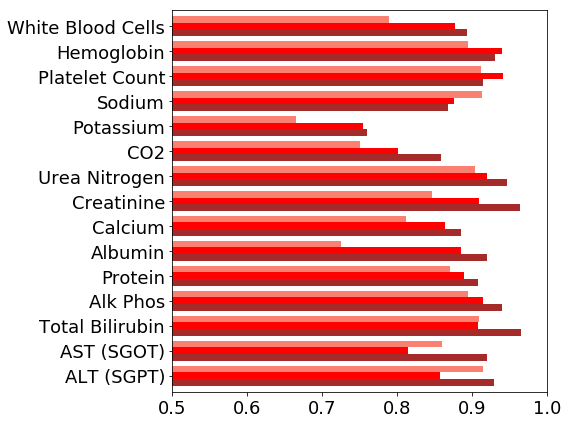

In [8]:
# fig, ax = plt.subplots(figsize=(10,6))
df_res[::-1].set_index('lab').rename(columns={'Stanford -> Stanford':'Stanford',
                                       'Stanford -> UCSF':'UCSF',
                                       'Stanford -> UMich':'UMich'})\
                [['UMich', 'UCSF', 'Stanford'][::-1]]\
                .plot.barh(width=0.8, figsize=(8,6), fontsize=18, legend=False,
                          color=['salmon','red','brown'][::-1])
# ax.set_ylabel('lab', fontsize=4)
plt.xlim([0.5,1])
plt.ylabel("")
plt.xticks(np.linspace(0.5,1,6))

# plt.legend(loc=(1,1))
plt.tight_layout()

plt.savefig('new_transfer.png')

['White Blood Cells' 0.8923294946108135 0.8762840420449116
 0.7884820840414284 0.8744357881434244 0.8849666579329974
 0.8127642862985988 0.8743799056938006 0.8778381214391032
 0.829190861837043]
['Hemoglobin' 0.9303509407427927 0.9399322156993283 0.8941576011001665
 0.8617219961219663 0.9002589276081563 0.7905803825985844
 0.9179689331145725 0.937462009478224 0.9022389060945204]
['Platelet Count' 0.91368633425045 0.940843849239512 0.9111199888098609
 0.8927136685970015 0.9490876929076828 0.9090583964191554
 0.8949836212225295 0.9387034096607053 0.9178658624460627]
['Sodium' 0.8669073178835944 0.8752516953639687 0.9121960575236266
 0.8547062715180607 0.8883471728660306 0.9096328144382684
 0.8606382473748152 0.8599154609048049 0.9135456421788315]
['Potassium' 0.7600574712643677 0.7538563981001198 0.6656291663398948
 0.7406053165367781 0.7681896906134374 0.7521370872872717
 0.7250960819899648 0.7469505261408466 0.7615166037397627]
['CO2' 0.8587876397999972 0.8009065137050952 0.75002453767

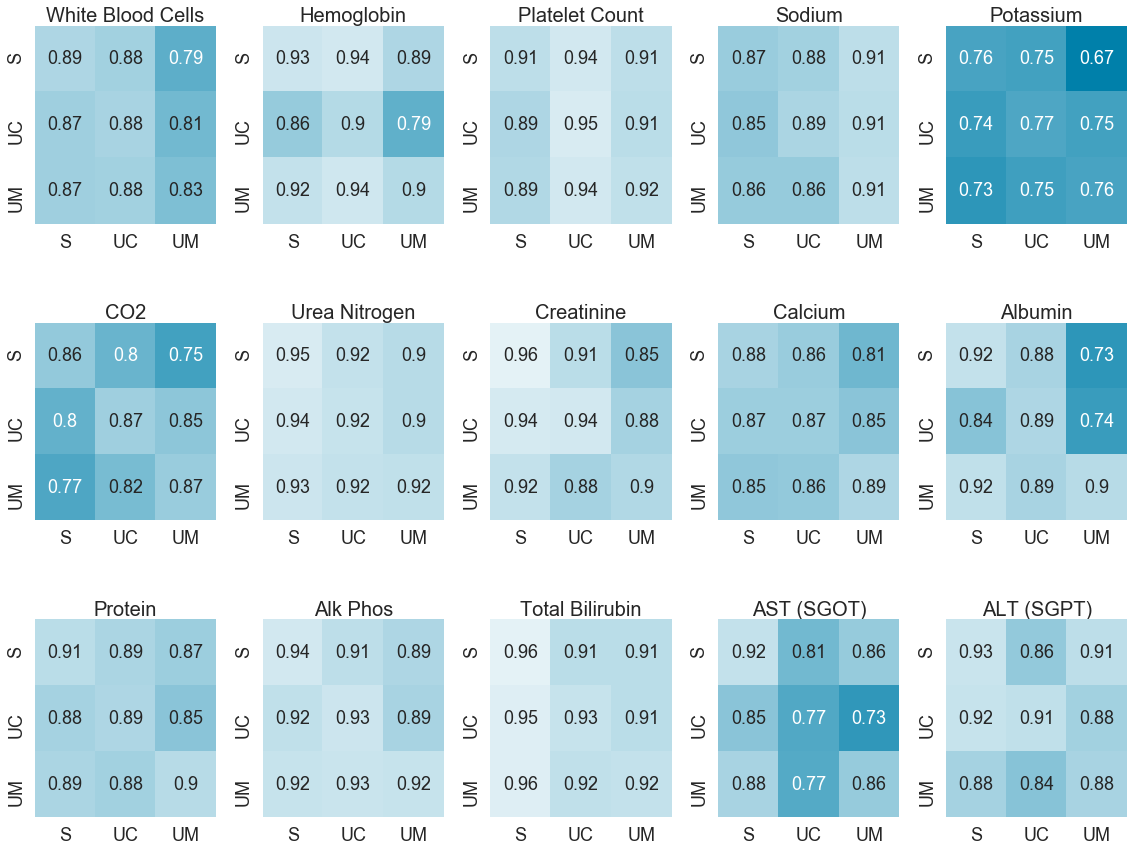

In [9]:
# TODO: move this stats part away
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 12))
col = 5
for ind in range(df_res.shape[0]):
    cur_row = df_res.iloc[ind].values
    print cur_row
    cur_lab = cur_row[0]
    cur_aucs = cur_row[1:].astype(float).reshape(3,3)

    i, j = ind/col, ind%col
    plt.subplot2grid((3, col), (i, j))
    ax = sns.heatmap(cur_aucs, vmin=0, vmax=1, cbar=False, annot=True, cmap='ocean',
                     annot_kws={"size": 18},
                     xticklabels=['S', 'UC', 'UM'], yticklabels=['S', 'UC', 'UM'])
    
    plt.xlabel(cur_lab, fontsize=20)
    ax.xaxis.set_label_position('top')
    ax.xaxis.set_tick_params(labelsize=18)
    ax.yaxis.set_tick_params(labelsize=18)


plt.tight_layout()
fig.subplots_adjust(hspace=.5)

plt.savefig(res_folderpath + 'transfer_heatmap.png')

In [17]:
# ind = 0
# cur_row = df_res.iloc[ind].values
# print cur_row
# cur_lab = cur_row[0]
# cur_aucs = cur_row[1:].astype(float).reshape(3,3)

# sns.set(font_scale=3)
# fig, ax = plt.subplots(figsize=(16, 12))
# ax = sns.heatmap(cur_aucs, vmin=0, vmax=1, cbar=True, annot=True, cmap='ocean',
#                  annot_kws={"size": 18},
#                  cbar_kws = {'orientation': 'horizontal'},
#                  xticklabels=['S', 'UC', 'UM'], yticklabels=['S', 'UC', 'UM'])

# plt.xlabel(cur_lab, fontsize=20)
# ax.xaxis.set_label_position('top')
# ax.xaxis.set_tick_params(labelsize=18)
# ax.yaxis.set_tick_params(labelsize=18)


# plt.tight_layout()
# plt.savefig(res_folderpath + 'colorbar.png')

In [15]:
df_CI = pd.read_csv(stats_folderpath+'/data-transferring-component-10000-episodes-lastnormal/all_transfers_withCI.csv').rename(columns={'lab':'Lab Test'})
df_CI.head()

,Lab Test,Stanford -> Stanford,"Stanford -> Stanford, left","Stanford -> Stanford, right",Stanford -> UCSF,"Stanford -> UCSF, left","Stanford -> UCSF, right",Stanford -> UMich,"Stanford -> UMich, left","Stanford -> UMich, right",UCSF -> Stanford,"UCSF -> Stanford, left","UCSF -> Stanford, right",UCSF -> UCSF,"UCSF -> UCSF, left","UCSF -> UCSF, right",UCSF -> UMich,"UCSF -> UMich, left","UCSF -> UMich, right",UMich -> Stanford,"UMich -> Stanford, left","UMich -> Stanford, right",UMich -> UCSF,"UMich -> UCSF, left","UMich -> UCSF, right",UMich -> UMich,"UMich -> UMich, left","UMich -> UMich, right"
0,White Blood Cells,0.89,0.88,0.91,0.88,0.86,0.89,0.79,0.77,0.81,0.87,0.86,0.89,0.88,0.87,0.90,0.81,0.80,0.83,0.87,0.86,0.89,0.88,0.86,0.89,0.83,0.81,0.84
1,Hemoglobin,0.93,0.92,0.94,0.94,0.93,0.95,0.89,0.88,0.91,0.86,0.84,0.88,0.90,0.89,0.92,0.79,0.77,0.81,0.92,0.90,0.93,0.94,0.93,0.95,0.90,0.89,0.91
2,Platelet Count,0.91,0.90,0.92,0.94,0.93,0.95,0.91,0.90,0.93,0.89,0.88,0.91,0.95,0.94,0.96,0.91,0.89,0.92,0.89,0.88,0.91,0.94,0.93,0.95,0.92,0.90,0.93
3,Sodium,0.87,0.85,0.88,0.88,0.86,0.89,0.91,0.90,0.93,0.85,0.84,0.87,0.89,0.87,0.90,0.91,0.89,0.92,0.86,0.84,0.88,0.86,0.84,0.88,0.91,0.90,0.93
4,Potassium,0.76,0.73,0.79,0.75,0.73,0.78,0.67,0.63,0.70,0.74,0.71,0.77,0.77,0.74,0.79,0.75,0.72,0.78,0.73,0.69,0.76,0.75,0.72,0.77,0.76,0.73,0.79


In [ ]:
shorten_dict = {'Stanford':'S', 'UCSF':'UC', 'UMich':'UM'}
sources = ['Stanford', 'UCSF', 'UMich']#shorten_dict.keys()
cols_CI = ['Lab Test']
for src in sources:
    for dst in sources:
        transfer = '%s -> %s' %(src, dst)
        cols_CI.append(transfer)
        df_CI['%s'%transfer] = df_CI[transfer].astype(str) + '\n[' + df_CI['%s, left'%transfer].astype(str) + ', ' + df_CI['%s, right'%transfer].astype(str) + ']'
df_CI[cols_CI]

In [108]:
df_CI[cols_CI].to_csv('data-transferring-component-10000-episodes-lastnormal/all_transfers_withCI_formatted.csv', index=False)